# This is assignment07

## Name : Jaehyun Lim
    
## Student ID : 20145450

$$ \hat{f} (x) = \theta _{0} + \theta _{1} x ^{1} + \theta _{2} x ^{2} + \theta _{3} x ^{3} + \cdots + \theta _{p} x ^{p} $$

$$ \begin{bmatrix}1 & x_1^1 & x_1^2 + \cdots + x_1^p \\ 1 & x_2^1 & x_2^2 + \cdots + x_2^p \\ \vdots  & \vdots  & \vdots  + \cdots + \vdots  \\ 1 & x_N^1 & x_N^2 + \cdots + x_N^p \end{bmatrix}
\begin{bmatrix} \theta _{1} \\ \theta _{2} \\ \vdots \\ \theta _{p} \end{bmatrix} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} $$

## import packages 

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Define variable & function

In [4]:

num     = 1001
std     = 5 

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 

def fun(x):
 
	# f = np.sin(x) * (1 / (1 + np.exp(-x))) 
	f = np.abs(x) * np.sin(x)

	return f

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-10,10,num)
y1      = fun(x)
y2      = y1 + nn * std


## Plot the noisy data (x, y1)

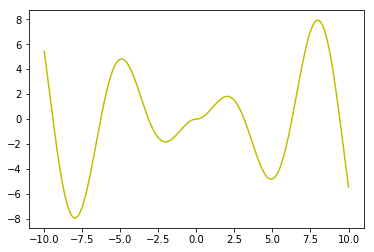

In [5]:
plt.figure(figsize=(6,4))
plt.plot(x, y1, label='noise', color='y')

## Plot the clean data (x, y2)

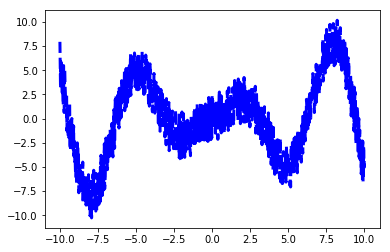

In [6]:
plt.figure(figsize=(6,4))
plt.plot(x, y2, ls='dashed', lw=3, color='b', label='clean')

## Plot the polynomial curves that fit the noisy data by the least square error with varying p = 0,1,2,3,···9

/Users/joelim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


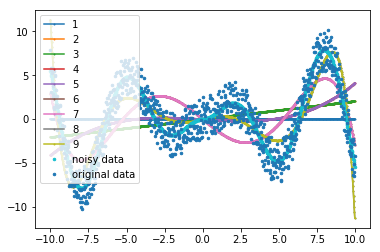

In [8]:
for i in range(1,10):
	degree = i
   	# form the Vandermonde matrix
	A = np.vander(x, degree)
 
	# find the x that minimizes the norm of Ax-y
	(coeffs, residuals, rank, sing_vals) = np.linalg.lstsq(A, y1)
 
	# create a polynomial using coefficients
	f = np.poly1d(coeffs)

	# for plot, estimate y for each observation time
	y_est = f(x)
	plt.plot(x, y_est, 'o-', label = i, markersize=1)

# create plot
plt.plot(x, y1, '.', label = 'noisy data', markersize=5)
plt.plot(x, y2, '.', label = 'original data', markersize=5)
plt.legend()
plt.show()

## Plot the residual error

/Users/joelim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


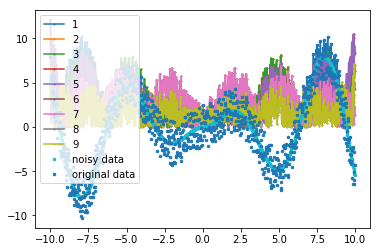

In [9]:
#residual error
def res(p,a):
	return np.sqrt(((p-a) ** 2))

for i in range(1,10):
	degree = i
   	# form the Vandermonde matrix
	A = np.vander(x, degree)
 
	# find the x that minimizes the norm of Ax-y
	(coeffs, residuals, rank, sing_vals) = np.linalg.lstsq(A, y1)
 
	# create a polynomial using coefficients
	f = np.poly1d(coeffs)

	# for plot, estimate y for each observation time
	y_est = f(x)
	#plt.plot(x, y_est, 'o-', label = i, markersize=1)
	error = res(np.array(y2),np.array(y_est))
	plt.plot(x, error, 'o-', label = i, markersize=1)


# create plot
plt.plot(x, y1, '.', label = 'noisy data', markersize=5)
plt.plot(x, y2, '.', label = 'original data', markersize=5)
plt.legend()
plt.show()


## The link to the github 

https://github.com/JaeHyunLim/assignment.git